<a href="https://colab.research.google.com/github/mwinzie/Nairobi-Hospital-Hypothyroidism-Model/blob/master/Moringa_Data_Science_Core_W8_Independent_Project_2019_09_Agnes_Mueni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.   Research Objective

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected majorly focused on Thyroid patients. The objective is to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.


# 2. Context
From the clinical camp tests conducted, the result can be able to predict whether or not a patient has hypothyroid.
To perform the prediction, I shall use Random Forest Model and SVM(Support Vector Machine) model to predict the existence of hypothyroid.

# 3. Experimental Design
The following are steps I will follow in order to complete this project:
1. Importing all the necessary libraries
2. Loading the data set
3. Read and clean the data set
4. Exploratory Data Analysis
5. Random Forest
6. SVM Model

# 4. Data Appropriateness
The dataset contains information about patients that underwent the thyroid tests during the medical camp at Nairobi Hospital.

In [0]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
#loading the hypothyroid dataset
hyp = pd.read_csv('hypothyroid.csv')

#previewing the first 5 observations in the dataset
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
#previewing the last 5 records in the dataset
hyp.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


From the observations above, it seems some observations are marked with a ?. I shall look at the number of missing values and the count of the ? in the dataset

In [0]:
#checking the dataset shape
hyp.shape

#the dataset that 3163 rows and 26 columns

(3163, 26)

In [0]:
#checking the basic information of the dataset
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

In [0]:
#checking for missing values
hyp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## Data Cleaning
> There are number missing values in the data. Now looking at the count of the ? in the dataset

In [0]:
#checking the number of times ? appears in each column
(hyp.iloc[:,1:26] == '?').sum()

age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Looking at the observations, the column sex has the least number of questionmarks, 73 i.e 2% of the whole dataset.
The TT4, T4U, and FTI all occupy 8% of the dataset. 3163
TSH - 14%
T3 - 21% 
TBG is the column with the largest number of ?. They occupy 91% of the dataset. I shall now replace with the ? with Nan and see how they compare.

In [0]:
#replacing all the ? with the nan value
for i in range(1,26):
  hyp.iloc[:, i].replace('?', np.nan, inplace=True)

In [0]:
hyp.isnull().sum()
#all questionmarks have now been replaced with the nan value. A preview is shown in the next cell

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
(hyp.iloc[:,1:26] == '?').sum()

#all questionmarks are now replaced

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
#the sex column has 2% of missing values in the whole dataset. This is a relative small number. I opt to delete all the nan values in the sex column
hyp.dropna(subset=['sex'], inplace = True)

In [0]:
hyp.shape

(3090, 26)

In [0]:
#the TBG column has a relative high number of missing values, 91%. The corresponding column, TBG measured indicates a yes or no whether the test was conducted or not. 
#Most of the nan values exist where the measured is a no. My assumption will be the test was not carried out and I shall fill all the nan values with a 0.
hyp['TBG'] = hyp['TBG'].fillna(0)

In [0]:
#previewing the first 10 observations and checking the changes
hyp.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,0
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,0
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,0
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,0
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,NaN,y,39,y,1.21,y,32,n,0
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,NaN,y,7.60,y,1.02,y,7.50,n,0


In [0]:
#previewing the unique values in every column
for i in hyp.columns:
  #to print a line in between the columns

  print('\n')
  print('column name:', i)
  print(hyp[i].unique())



column name: status
['hypothyroid' 'negative']


column name: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


column name: sex
['M' 'F']


column name: on_thyroxine
['f' 't']


column name: query_on_thyroxine
['f' 't']


column name: on_antithyroid_medication
['f' 't']


column name: thyroid_surgery
['f' 't']


column name: query_hypothyroid
['f' 't']


column name: query_hyperthyroid
['f' 't']


column name: pregnant
['f' 't']


column name: sick
['f' 't']


column name: tumor
['f' 't']


column name: lithium
['f' 't']


column name: goitre
['f' 't']


column name: TS

In [0]:
#changing columns to type category
hyp[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']] = hyp[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']].astype('category')


In [0]:
#the numerical columns have the data type object. I shall fill all the nan values with the mode of each of the columns so as to be able to convert the columns to
#int or float (where there are decimal points) data types
ncols = hyp[['TSH', 'T3', 'TT4','T4U', 'FTI']]
ncols.mode()

,TSH,T3,TT4,T4U,FTI
0,0,1.80,98,0.98,98


In [0]:
hyp['age'].mode()

0    59
1    60
dtype: object

In [0]:
#filling the nan values of the numerical columns with the mode value
hyp['age'] = hyp['age'].fillna(59)
hyp['TSH'] = hyp['TSH'].fillna(0)
hyp['T3'] = hyp['T3'].fillna(1.80)
hyp['TT4'] = hyp['TT4'].fillna(98)
hyp['T4U'] = hyp['T4U'].fillna(0.98)
hyp['FTI'] = hyp['FTI'].fillna(98)


In [0]:
#checking to see that all nan values have been replaced
hyp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
hyp.dtypes

status                       category
age                            object
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                            object
T3_measured                  category
T3                             object
TT4_measured                 category
TT4                            object
T4U_measured                 category
T4U                            object
FTI_measured                 category
FTI                            object
TBG_measured                 category
TBG                            object
dtype: objec

In [0]:
#converting the numerical datatypes to type int or float
hyp['age'] = hyp['age'].astype(int)
hyp[['TSH', 'T3', 'TT4','T4U', 'FTI','TBG']] = hyp[['TSH', 'T3', 'TT4','T4U', 'FTI','TBG']].astype(float)

In [0]:
#confirming the changes have been made to the data types
hyp.dtypes

status                       category
age                             int64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [0]:
#saving the cleaned dataset to csv
hyp.to_csv('cleanhypothyroid.csv')

# Exploratory Data Analysis

In [0]:
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [0]:
#the function shows the measures of central tendencies and location for the dataset
hyp.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.00000,3090.000000,3090.000000
mean,52.201942,5.062036,1.902330,107.603204,0.98479,110.646893,2.566861
std,18.226782,22.395322,0.870453,43.414038,0.21021,41.525491,10.104470
min,1.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000
25%,37.250000,0.000000,1.500000,85.000000,0.87000,92.000000,0.000000
50%,58.000000,0.400000,1.800000,100.000000,0.98000,104.000000,0.000000
75%,65.000000,1.700000,2.200000,124.000000,1.05000,125.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.21000,485.000000,122.000000


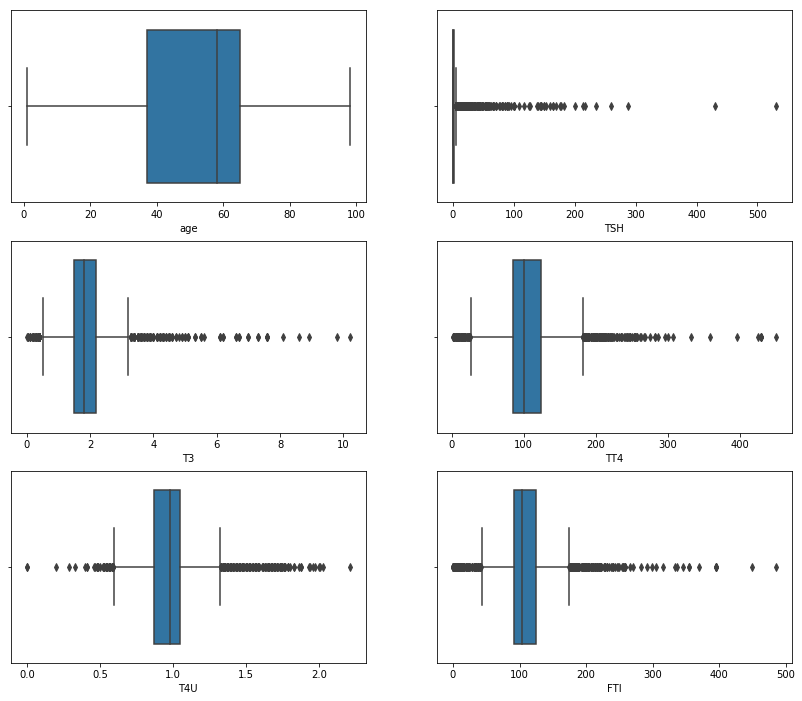

In [0]:
#checking for the presence of outliers
#created a list for all the numerical columns in the hyp dataframe
#used a for loop to iterate over the list of the numerical columns so as to plot all the boxplots

numericcols = ['age','TSH', 'T3', 'TT4','T4U', 'FTI']
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize=(14,12))
for ax, data,column in zip(axes.flatten(),hyp,numericcols):
  sns.boxplot(hyp[column],ax=ax)

The data seems to have many outliers. I shall work with the data as is and see how the model behaves.

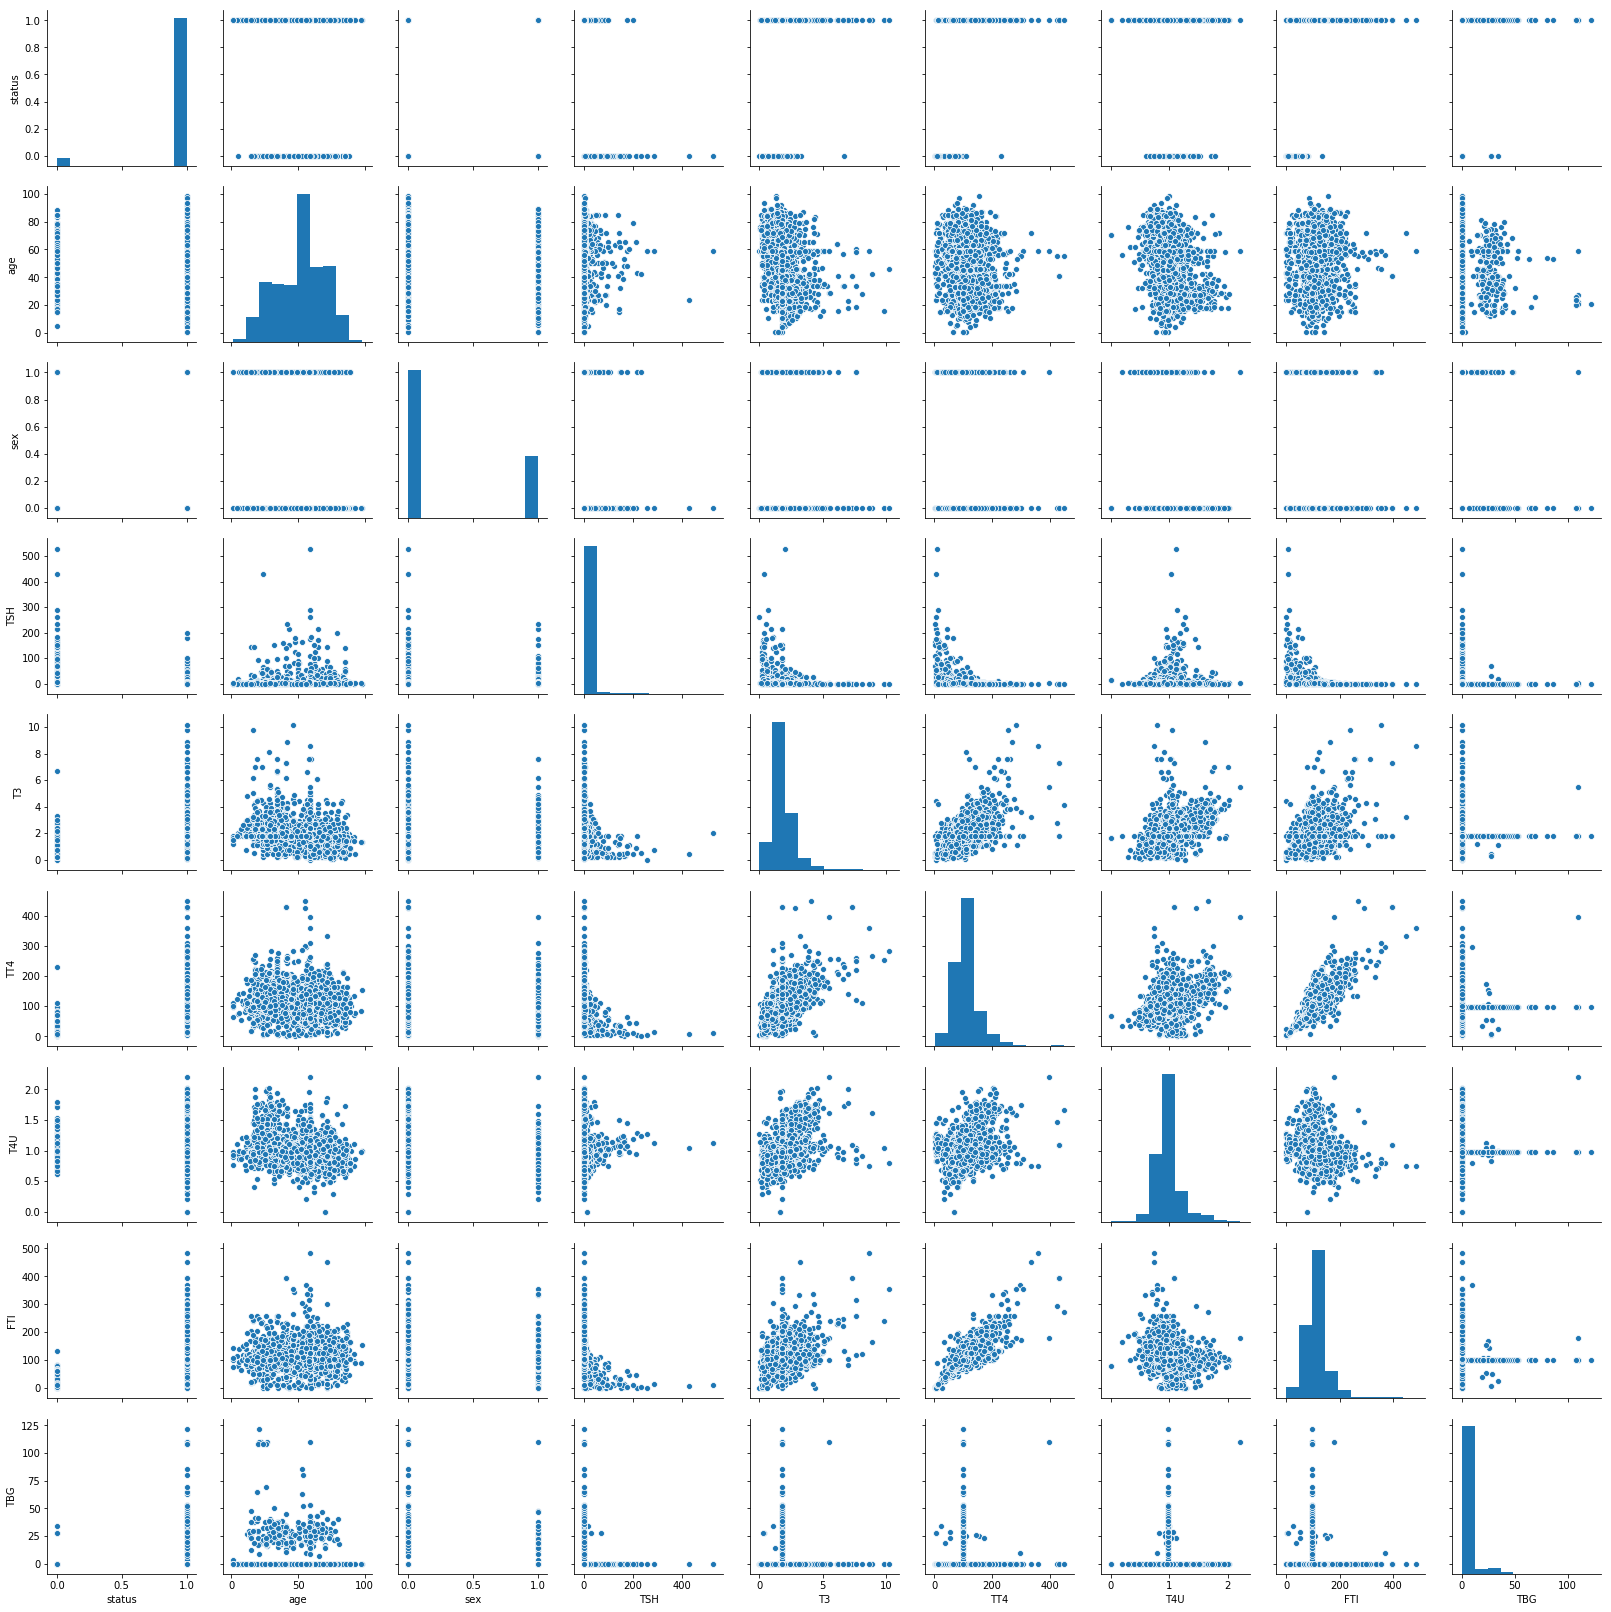

In [108]:
#plotting the scatter plots for my dataset 
#below shows the scatter plots and histograms of all the numerical variables in the data set
sns.pairplot(hyp)

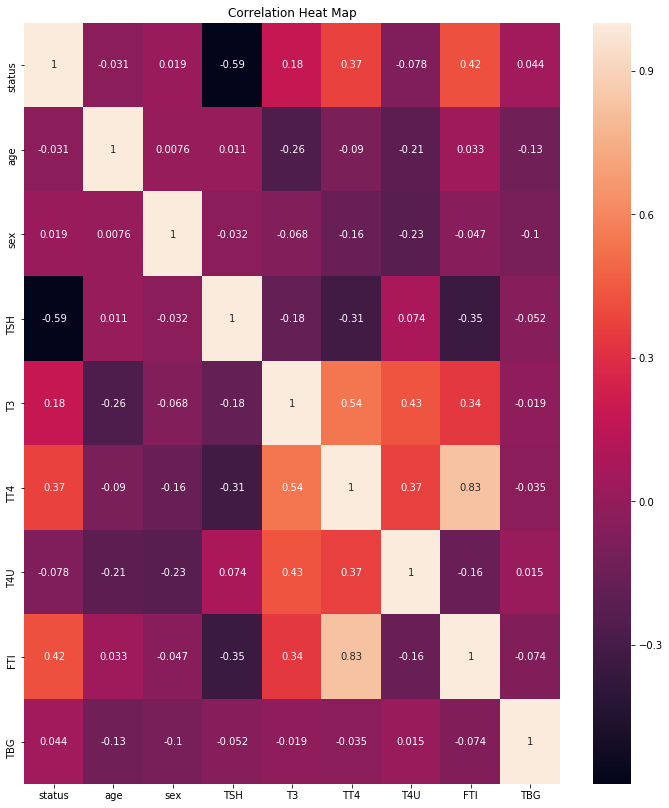

In [119]:
#creating the correlation heatmap
correlations = hyp.corr()

plt.subplots(figsize = (12,14))

sns.heatmap(correlations, annot = True)

plt.title('Correlation Heat Map')

plt.show()


This shows the correlations between the variables. Ofcourse variables related to each other indicate a 1. 

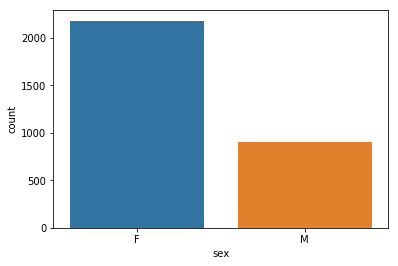

In [0]:
#graph showing the number of candidates who participated in the exercise in terms of gender.
sns.countplot(x='sex',data=hyp, )

From the graph above it shows more females participated in the tests compared to males.

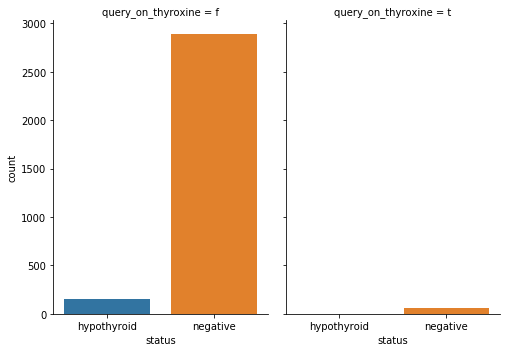

In [0]:
sns.catplot(x="status", col="query_on_thyroxine", data=hyp, kind="count", height=5, aspect=.7);  

In the query on throxine variable there are some that have hypothyroid and dont use thyroxine. 

# Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [0]:
#using the label encoder to decode the sex and status column
le = preprocessing.LabelEncoder()
hyp['status'] = le.fit_transform(hyp['status'])
hyp['sex'] = le.fit_transform(hyp['sex'])

In [0]:
hyp.shape

(3090, 26)

In [0]:
test_features = hyp.drop(['status'], axis = 1)
X = test_features
y = hyp['status']

In [0]:
X.shape

(3090, 25)

In [0]:
#converting the features into dummies
X  = pd.get_dummies(X, drop_first = True)

In [0]:
#training the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0 )
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)
#predicting the model
y_pred = forest.predict(X_test)

y_pred = np.round(y_pred)

#creating a dataframe to compare the actual vs the predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,927.000000,927.000000
mean,0.954693,0.955771
std,0.208090,0.205714
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [0]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test,y_pred))

0.9946062567421791
0.9971767363071711


The random forest model gives an accuracy score od 99.4% and f1 score of 99.7%. The results are pretty good for the prediction of the disease.

In [0]:
#creating a confusion matrix to show 
metrics.confusion_matrix(y_test, y_pred)


array([[ 39,   3],
       [  2, 883]])

From the confusion matrix above, it shows that the model predicted 39 True positives as correct predictions and 3 false positives. 
the model also predicts 2 false negatives and 883 true negatives as not having hypothyroid

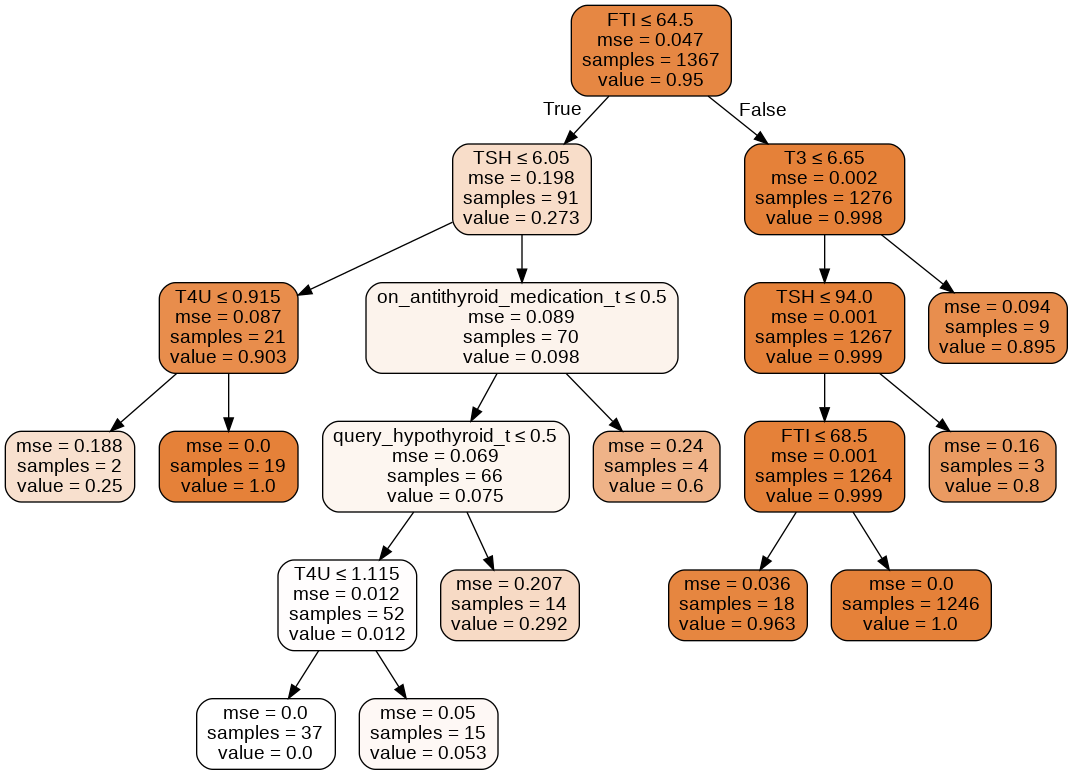

In [0]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

## Feature Importance
With feature importance, you get to see the variables that are more important than others.

In [0]:
#creating the importance variable
importances = list(tree.feature_importances_)
#connecting each feature with its importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(test_features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: query_hypothyroid    Importance: 0.77071
Variable: on_thyroxine         Importance: 0.1747
Variable: thyroid_surgery      Importance: 0.02193
Variable: goitre               Importance: 0.01596
Variable: tumor                Importance: 0.01445
Variable: query_on_thyroxine   Importance: 0.00224
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: TSH                  Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: T3                   Importance: 0.0
Variable: TT4_measured         Importance: 0.0
Variable: TT4                  Importance: 0.0
Variable: T4U_measured         Importance: 0.0
Variable: T4U                  I

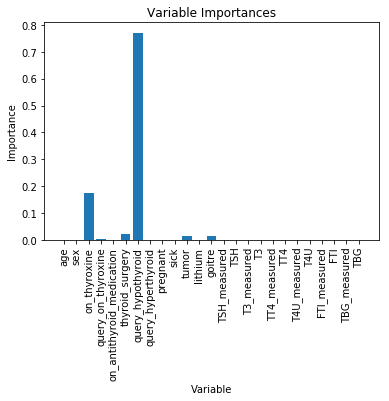

In [0]:
#creating a bar graph that shows the visualization of the important features
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

From the results it shows on_thyroxine,query_hypothyroid, thyroid_surgery, goitre, tumorand query_on_thyroxine are some of the important features in the dataset. I shall run with those and see how the model behaves. 

# Gradient Boosting
I shall apply to see if the accuracy changes although getting an accuracy 99% is pretty good but just trying to see if anything changes


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0 )

In [0]:
g = GradientBoostingClassifier()
#fitting the model
g = g.fit(X_train, y_train)
#predicting the model
y_pred1 = g.predict(X_test)

In [99]:
#metrics of the model
print(metrics.accuracy_score(y_test, y_pred1))
metrics.confusion_matrix(y_test, y_pred1)

0.9935275080906149


array([[ 39,   3],
       [  3, 882]])

The prediction have improved after using the gradient boost classifier. The false positive is the only one that increased by one, from 3 to 4

# SVM model

In [102]:
from sklearn.svm import SVC,LinearSVC
from sklearn import model_selection
#selected the columns query hypothyroid and fti as my features for the purpose of visualization
colum =hyp[['query_hypothyroid', 'FTI']]
#converting the features to dummy variables
colum = pd.get_dummies(colum)
#setting the target variable
target =hyp['status']
#splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(colum, target, test_size=0.25, random_state=0)
#listing the models i shall use then append them to a list
models = []
models.append(('Polynormial', SVC(kernel='poly') ))
models.append(('Radial Basis Function', SVC(kernel='rbf')))
models.append(('Linear', SVC(kernel='linear')))
#model evaluation
results = []
modelnames = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=3, random_state=0)
 cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 t = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(t)

Polynormial: 0.971948 (0.003212)
Radial Basis Function: 0.973675 (0.003697)
Linear: 0.970221 (0.001812)


The three models give an accuracy score of 0.97 which are some pretty accurate results. I do not see the need to tune the model with such accuracies

In [107]:
from sklearn.preprocessing import MinMaxScaler
# Creating an SVC model with linear kernel with all the variables.
# Splitting the independent and dependent variables.

X1=hyp.drop('status', axis=1)
# Creating dummies for the features(X1).
X1=pd.get_dummies(X1)
y=hyp['status']
scaler = MinMaxScaler()
X = scaler.fit_transform(X1)
# Training the model using 75% of our dataset
X_train, X_test, y_train, y_test=train_test_split(X1,y,test_size=0.2, random_state=0, stratify=y)
# Building the model
linear=SVC(kernel='linear')
linear.fit(X_train, y_train)
y_pred=linear.predict(X_test)
# Model Evaluation
accuracy = metrics.accuracy_score(y_pred, y_test)
confusionmatrix = metrics.confusion_matrix(y_pred, y_test)
classification = metrics.classification_report(y_pred, y_test)
print(accuracy)
print(confusionmatrix)
print(classification)

0.9838187702265372
[[ 26   6]
 [  4 582]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.99      0.99      0.99       586

    accuracy                           0.98       618
   macro avg       0.93      0.90      0.92       618
weighted avg       0.98      0.98      0.98       618



SVM has an accuracy score of 98% making 26 and 582 correct prections in having hypothyroid or no. Compared to the random forest